<a href="https://colab.research.google.com/github/amlannag6/AndroidMalicious_ML_Model_Deployment-/blob/main/Hybridanalysis_MaliciousActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import joblib
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/amlannag6/AndroidMalicious_ML_Model_Deployment-/main/Prepared_DataSets/Dataset100_labled_fullTest.csv')


In [ ]:
data.fillna(0)

,package_name,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,defineClass,android.intent.action.PACKAGE_RESTARTED,android.intent.action.CALL_BUTTON,findClass,intent.action.RUN,android.intent.action.SET_WALLPAPER,Runtime.loadLibrary,android.intent.action.BATTERY_LOW,android.intent.action.ACTION_POWER_CONNECTED,Class
0,com.fungqyy.apk,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,NetLoop_VPN_5.0.4_apk-dl.com.apk,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"md.obsidian_1.1.0-38_minAPI21_arm64-v8a,armeab...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3168.apk,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,braga-store.apk,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,com.prasesfee.apk,1,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
95,VLC_for_Android_v3.4.3_apkpure.com.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,com.parental.control.v4.apk,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
97,fakeAV_75B8F9DBB1CD79B7FC074F7F499150CF_LabelR...,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.columns

Index(['package_name', 'SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS',
       'WRITE_SMS', 'READ_SYNC_SETTINGS',
       ...
       'defineClass', 'android.intent.action.PACKAGE_RESTARTED',
       'android.intent.action.CALL_BUTTON', 'findClass', 'intent.action.RUN',
       'android.intent.action.SET_WALLPAPER', 'Runtime.loadLibrary',
       'android.intent.action.BATTERY_LOW',
       'android.intent.action.ACTION_POWER_CONNECTED', 'Class'],
      dtype='object', length=208)

In [ ]:
##encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['Class'])
data['Class'] = le.transform(data['Class'])
print(data['Class'])

0     1
1     0
2     0
3     1
4     0
     ..
94    1
95    0
96    1
97    1
98    0
Name: Class, Length: 99, dtype: int64


In [ ]:
data.Class.value_counts()

1    62
0    37
Name: Class, dtype: int64

In [ ]:
data.isna().sum()

package_name                                    0
SEND_SMS                                        0
READ_PHONE_STATE                                0
GET_ACCOUNTS                                    0
RECEIVE_SMS                                     0
                                               ..
android.intent.action.SET_WALLPAPER             0
Runtime.loadLibrary                             0
android.intent.action.BATTERY_LOW               0
android.intent.action.ACTION_POWER_CONNECTED    0
Class                                           0
Length: 208, dtype: int64

In [ ]:
data.describe()

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,...,defineClass,android.intent.action.PACKAGE_RESTARTED,android.intent.action.CALL_BUTTON,findClass,intent.action.RUN,android.intent.action.SET_WALLPAPER,Runtime.loadLibrary,android.intent.action.BATTERY_LOW,android.intent.action.ACTION_POWER_CONNECTED,Class
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.000000
mean,0.242424,0.494949,0.242424,0.353535,0.292929,0.181818,0.161616,0.222222,0.161616,0.161616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626263
std,0.430730,0.502519,0.430730,0.480500,0.457422,0.387657,0.369972,0.417855,0.369972,0.369972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


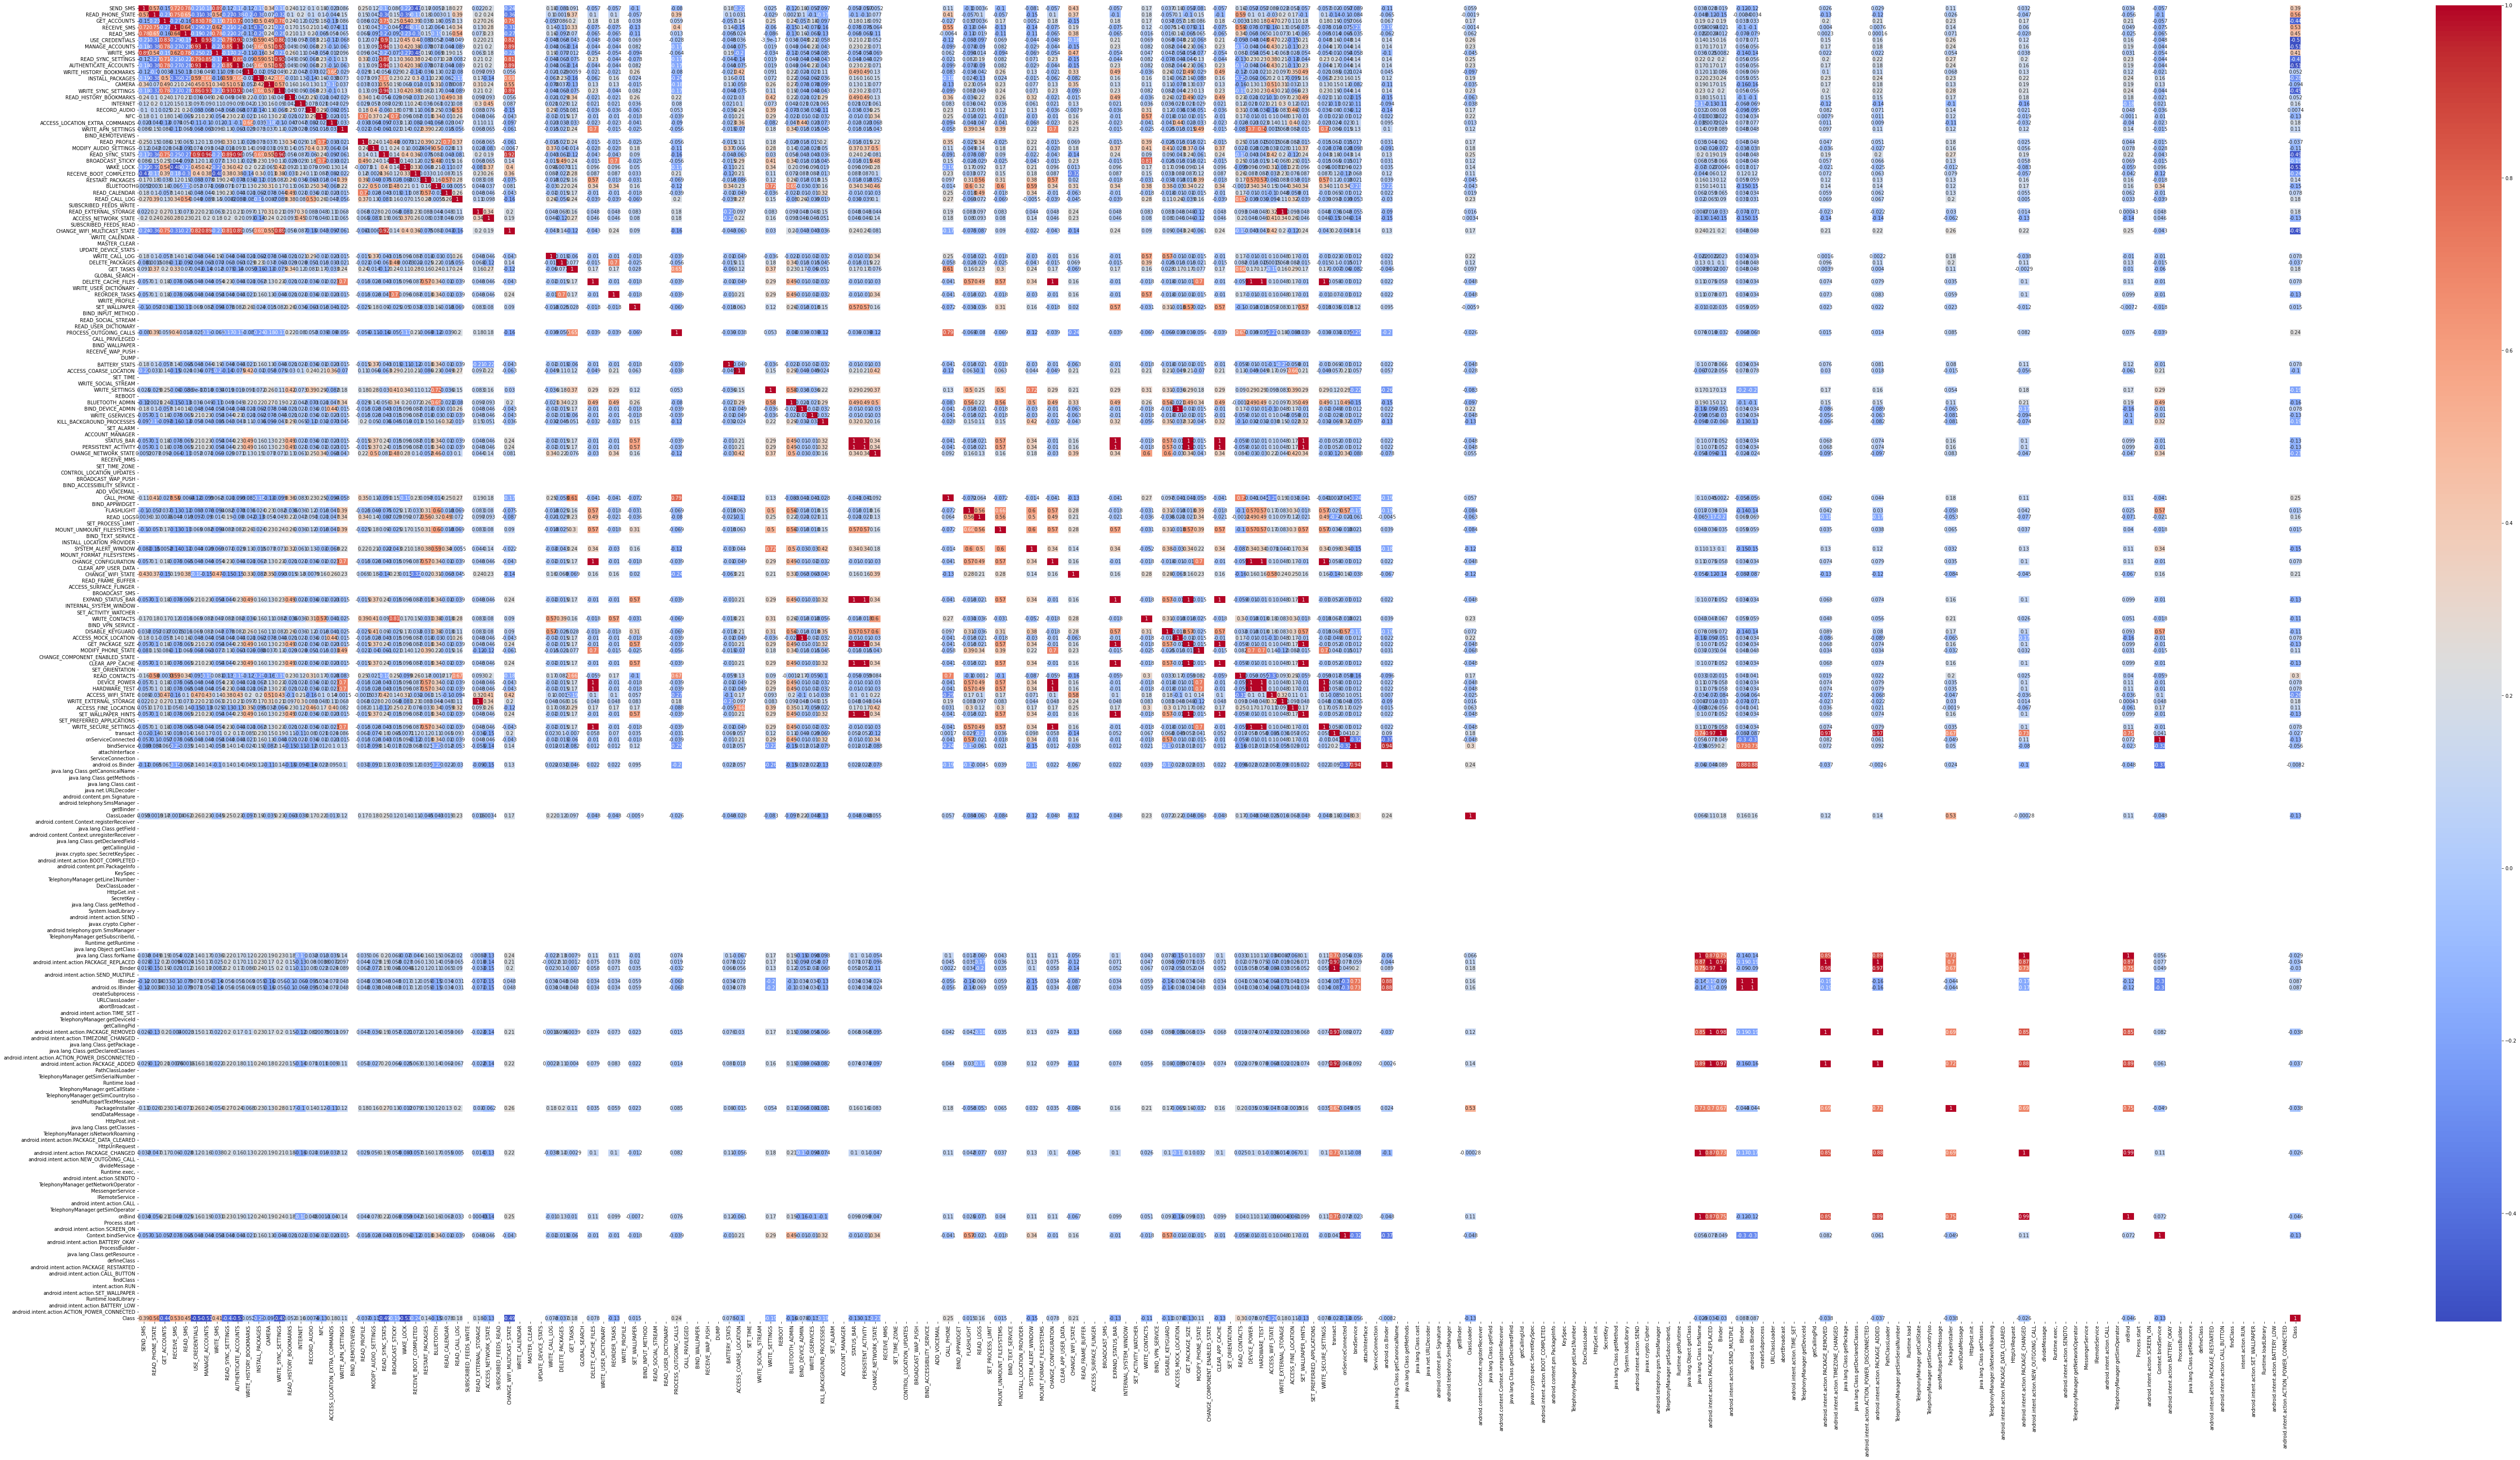

In [ ]:
plt.figure(figsize = (100,50))  
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

In [ ]:
#sns.pairplot(data , diag_kind = 'kde');

In [ ]:
data=data.drop(["abortBroadcast","ACCESS_SURFACE_FLINGER","ACCOUNT_MANAGER","ADD_VOICEMAIL","android.content.Context.registerReceiver","android.content.Context.unregisterReceiver","android.content.pm.PackageInfo","android.content.pm.Signature","android.intent.action.ACTION_POWER_CONNECTED","android.intent.action.ACTION_POWER_DISCONNECTED","android.intent.action.BATTERY_LOW",
                "android.intent.action.BATTERY_OKAY"
                ,"android.intent.action.BOOT_COMPLETED"
                ,"android.intent.action.CALL"
                ,"android.intent.action.CALL_BUTTON",
                "android.intent.action.NEW_OUTGOING_CALL"
                ,"android.intent.action.PACKAGE_DATA_CLEARED"
                ,"android.intent.action.SCREEN_ON"
                ,"android.intent.action.SEND",
                "android.intent.action.SEND_MULTIPLE"
                ,"android.intent.action.SENDTO","android.intent.action.TIME_SET"
                ,"android.intent.action.TIMEZONE_CHANGED","android.telephony.gsm.SmsManager"
                ,"android.telephony.SmsManager","attachInterface","BIND_ACCESSIBILITY_SERVICE"
                ,"BIND_APPWIDGET","BIND_INPUT_METHOD","BIND_REMOTEVIEWS","BIND_TEXT_SERVICE"
                ,"BIND_VPN_SERVICE","BROADCAST_SMS","BROADCAST_WAP_PUSH","CALL_PRIVILEGED"
                ,"CHANGE_COMPONENT_ENABLED_STATE","CHANGE_CONFIGURATION","CHANGE_NETWORK_STATE"
                ,"CHANGE_WIFI_MULTICAST_STATE","CHANGE_WIFI_STATE","CLEAR_APP_USER_DATA"
                ,"CONTROL_LOCATION_UPDATES","createSubprocess","defineClass","divideMessage"
                ,"DUMP","findClass","getBinder","getCallingPid","getCallingUid","GLOBAL_SEARCH","HARDWARE_TEST"
                ,"HttpGet.init","HttpPost.init","HttpUriRequest","INSTALL_LOCATION_PROVIDER","intent.action.RUN","INTERNAL_SYSTEM_WINDOW"
                ,"IRemoteService","java.lang.Class.cast","java.lang.Class.getCanonicalName","java.lang.Class.getDeclaredClasses"
                ,"java.lang.Class.getDeclaredField","java.lang.Class.getField","java.lang.Class.getMethod","java.lang.Class.getMethods","java.lang.Class.getPackage","java.lang.Class.getResource","java.net.URLDecoder","javax.crypto.Cipher","javax.crypto.spec.SecretKeySpec","KeySpec","MASTER_CLEAR","MessengerService","MODIFY_PHONE_STATE","MOUNT_FORMAT_FILESYSTEMS","PathClassLoader","Process.start","ProcessBuilder","READ_FRAME_BUFFER","READ_LOGS","READ_SOCIAL_STREAM","READ_USER_DICTIONARY","RECEIVE_BOOT_COMPLETED","RECEIVE_MMS","RECEIVE_WAP_PUSH","Runtime.getRuntime","Runtime.load","Runtime.loadLibrary","SecretKey","sendDataMessage","sendMultipartTextMessage","ServiceConnection","SET_ACTIVITY_WATCHER","SET_ORIENTATION","SET_PREFERRED_APPLICATIONS","SET_PROCESS_LIMIT","SET_TIME","SET_TIME_ZONE","SUBSCRIBED_FEEDS_READ","SUBSCRIBED_FEEDS_WRITE","System.loadLibrary","TelephonyManager.getCallState","TelephonyManager.getDeviceId","TelephonyManager.getLine1Number","TelephonyManager.getNetworkOperator","TelephonyManager.getSimCountryIso","TelephonyManager.getSimOperator","TelephonyManager.getSimSerialNumber","TelephonyManager.isNetworkRoaming","UPDATE_DEVICE_STATS","URLClassLoader","WRITE_CALENDAR","WRITE_PROFILE","WRITE_SOCIAL_STREAM","WRITE_USER_DICTIONARY" ],axis=1)

In [ ]:
data.columns

Index(['package_name', 'SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS',
       'WRITE_SMS', 'READ_SYNC_SETTINGS', 'AUTHENTICATE_ACCOUNTS',
       'WRITE_HISTORY_BOOKMARKS', 'INSTALL_PACKAGES', 'CAMERA',
       'WRITE_SYNC_SETTINGS', 'READ_HISTORY_BOOKMARKS', 'INTERNET',
       'RECORD_AUDIO', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS',
       'WRITE_APN_SETTINGS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS',
       'READ_SYNC_STATS', 'BROADCAST_STICKY', 'WAKE_LOCK', 'RESTART_PACKAGES',
       'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'READ_EXTERNAL_STORAGE',
       'ACCESS_NETWORK_STATE', 'WRITE_CALL_LOG', 'DELETE_PACKAGES',
       'GET_TASKS', 'DELETE_CACHE_FILES', 'REORDER_TASKS', 'SET_WALLPAPER',
       'PROCESS_OUTGOING_CALLS', 'BIND_WALLPAPER', 'BATTERY_STATS',
       'ACCESS_COARSE_LOCATION', 'WRITE_SETTINGS', 'REBOOT', 'BLUETOOTH_ADMIN',
       'BIND_DEVICE_ADMIN', 'WRITE_GSERVICES', 'KILL_BACKGROUND_PROCESSES'

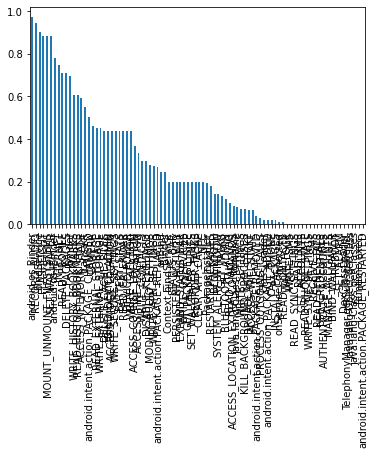

In [ ]:
X,y=data.iloc[:,2:90].astype("int"), data.Class.astype("int")
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
scaler = preprocessing.RobustScaler()
scaledData = scaler.fit_transform(data.iloc[:,1:91])
scaledData = pd.DataFrame(scaledData, columns=['SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS',
       'WRITE_SMS', 'READ_SYNC_SETTINGS', 'AUTHENTICATE_ACCOUNTS',
       'WRITE_HISTORY_BOOKMARKS', 'INSTALL_PACKAGES', 'CAMERA',
       'WRITE_SYNC_SETTINGS', 'READ_HISTORY_BOOKMARKS', 'INTERNET',
       'RECORD_AUDIO', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS',
       'WRITE_APN_SETTINGS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS',
       'READ_SYNC_STATS', 'BROADCAST_STICKY', 'WAKE_LOCK', 'RESTART_PACKAGES',
       'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'READ_EXTERNAL_STORAGE',
       'ACCESS_NETWORK_STATE', 'WRITE_CALL_LOG', 'DELETE_PACKAGES',
       'GET_TASKS', 'DELETE_CACHE_FILES', 'REORDER_TASKS', 'SET_WALLPAPER',
       'PROCESS_OUTGOING_CALLS', 'BIND_WALLPAPER', 'BATTERY_STATS',
       'ACCESS_COARSE_LOCATION', 'WRITE_SETTINGS', 'REBOOT', 'BLUETOOTH_ADMIN',
       'BIND_DEVICE_ADMIN', 'WRITE_GSERVICES', 'KILL_BACKGROUND_PROCESSES',
       'SET_ALARM', 'STATUS_BAR', 'PERSISTENT_ACTIVITY', 'CALL_PHONE',
       'FLASHLIGHT', 'MOUNT_UNMOUNT_FILESYSTEMS', 'SYSTEM_ALERT_WINDOW',
       'EXPAND_STATUS_BAR', 'WRITE_CONTACTS', 'DISABLE_KEYGUARD',
       'ACCESS_MOCK_LOCATION', 'GET_PACKAGE_SIZE', 'CLEAR_APP_CACHE',
       'READ_CONTACTS', 'DEVICE_POWER', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'WRITE_SECURE_SETTINGS', 'transact', 'onServiceConnected',
       'bindService', 'android.os.Binder', 'ClassLoader', 'DexClassLoader',
       'TelephonyManager.getSubscriberId,', 'java.lang.Object.getClass',
       'java.lang.Class.forName', 'android.intent.action.PACKAGE_REPLACED',
       'Binder', 'IBinder', 'android.os.IBinder',
       'android.intent.action.PACKAGE_REMOVED',
       'android.intent.action.PACKAGE_ADDED', 'PackageInstaller',
       'java.lang.Class.getClasses', 'android.intent.action.PACKAGE_CHANGED',
       'Runtime.exec,', 'onBind', 'Context.bindService',
       'android.intent.action.PACKAGE_RESTARTED',
       'android.intent.action.SET_WALLPAPER'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaledData.iloc[:,1:91], data.Class.astype("str"), test_size=0.30, random_state=10)

In [ ]:
y1_test=y_test.astype("int64")

In [ ]:
#MCC
def mcc(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    n=(tp*tn)-(fp*fn)
    d=((tp+fp)*(fn+tn)*(fp+tn)*(tp+fn))
    d=d**0.5
    r=n/d
    return r

In [ ]:
#R square
def r2(y_true,y_pred):
    m_t_v=np.mean(y_true)
    numerator=0
    denominator=0
    for yt,yp in zip(y_true,y_pred):
        numerator +=(yt-yp)**2
        denominator +=(yt-m_t_v)**2
    r=numerator/denominator
    return 1-r

In [ ]:
def scoreset(y_true,y_pred):
    score_set=[]
    pred=y_pred
    y_test=y_true
    print("cohen kappa score",cohen_kappa_score(y_test, pred))
    score_set.append(cohen_kappa_score(y_test, pred))
    print("cohen kappa score quadratic",cohen_kappa_score(y_test, pred, weights="quadratic"))
    score_set.append(cohen_kappa_score(y_test, pred, weights="quadratic"))
    print("R square score", r2(y_test,pred))
    score_set.append(r2(y_test,pred))
    print("MCC score", mcc(y_test,pred))
    score_set.append(mcc(y_test,pred))
    print("Brier Score Loss",brier_score_loss(y_test, pred))
    score_set.append(brier_score_loss(y_test, pred))
    print("AUC ROC Score",roc_auc_score(y_test, pred))
    score_set.append(roc_auc_score(y_test, pred))
    print("")
    print("accuracy:",accuracy_score(y_test,pred))
    score_set.append(accuracy_score(y_test,pred))
    print("F1 Score:",f1_score(y_test,pred))
    score_set.append(f1_score(y_test,pred))
    print("Precision:",precision_score(y_test,pred))
    score_set.append(precision_score(y_test,pred))
    print("Recall:",recall_score(y_test,pred))
    score_set.append(recall_score(y_test,pred))
    return score_set
    

In [ ]:
#LinearSVM
from sklearn import svm

lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
pred = lin_clf.predict(X_test)
pred=pred.astype("int64")
## accuracy
s=scoreset(y1_test,pred)
#print(s

cohen kappa score 0.647887323943662
cohen kappa score quadratic 0.647887323943662
R square score 0.3055555555555558
MCC score 0.6494998689336408
Brier Score Loss 0.16666666666666666
AUC ROC Score 0.8194444444444444

accuracy: 0.8333333333333334
F1 Score: 0.8648648648648649
Precision: 0.8421052631578947
Recall: 0.8888888888888888


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

pred=pred.astype("int64")

s=scoreset(y1_test,pred)

cohen kappa score 0.5454545454545454
cohen kappa score quadratic 0.5454545454545454
R square score 0.027777777777778123
MCC score 0.5766967882001441
Brier Score Loss 0.23333333333333334
AUC ROC Score 0.7916666666666666

accuracy: 0.7666666666666667
F1 Score: 0.7741935483870968
Precision: 0.9230769230769231
Recall: 0.6666666666666666


In [ ]:
# kneighbors algorithm

for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    pred=pred.astype("int64")
    # accuracy
    accuracy = accuracy_score(pred, y1_test)
    print("kneighbors {}".format(i))
    s=scoreset(y1_test,pred)

kneighbors 3
cohen kappa score 0.34782608695652173
cohen kappa score quadratic 0.34782608695652173
R square score -0.24999999999999956
MCC score 0.3563483225498992
Brier Score Loss 0.3
AUC ROC Score 0.6666666666666667

accuracy: 0.7
F1 Score: 0.7692307692307692
Precision: 0.7142857142857143
Recall: 0.8333333333333334
kneighbors 6
cohen kappa score 0.3661971830985915
cohen kappa score quadratic 0.3661971830985915
R square score -0.24999999999999956
MCC score 0.3671086215711883
Brier Score Loss 0.3
AUC ROC Score 0.6805555555555554

accuracy: 0.7
F1 Score: 0.7567567567567567
Precision: 0.7368421052631579
Recall: 0.7777777777777778
kneighbors 9
cohen kappa score 0.375
cohen kappa score quadratic 0.375
R square score -0.11111111111111072
MCC score 0.4803844614152614
Brier Score Loss 0.26666666666666666
AUC ROC Score 0.6666666666666667

accuracy: 0.7333333333333333
F1 Score: 0.8181818181818181
Precision: 0.6923076923076923
Recall: 1.0
kneighbors 12
cohen kappa score 0.375
cohen kappa score q

In [ ]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=10)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)
pred=pred.astype("int64")
s=scoreset(y1_test,pred)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=10)
0.8
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.80      0.89      0.84        18

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30

cohen kappa score
0.5714285714285714
[[ 8  4]
 [ 2 16]]
cohen kappa score 0.5714285714285714
cohen kappa score quadratic 0.5714285714285714
R square score 0.16666666666666696
MCC score 0.5773502691896257
Brier Score Loss 0.2
AUC ROC Score 0.7777777777777778

accuracy: 0.8
F1 Score: 0.8421052631578948
Precision: 0.8
Recall: 0.8888888888888888


In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
pred=xgb_clf.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)
pred=pred.astype("int64")
s=scoreset(y1_test,pred)

0.7
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.74      0.78      0.76        18

    accuracy                           0.70        30
   macro avg       0.69      0.68      0.68        30
weighted avg       0.70      0.70      0.70        30

cohen kappa score
0.3661971830985915
[[ 7  5]
 [ 4 14]]
cohen kappa score 0.3661971830985915
cohen kappa score quadratic 0.3661971830985915
R square score -0.24999999999999956
MCC score 0.3671086215711883
Brier Score Loss 0.3
AUC ROC Score 0.6805555555555554

accuracy: 0.7
F1 Score: 0.7567567567567567
Precision: 0.7368421052631579
Recall: 0.7777777777777778


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1.3)#vary the learning rate from 0 to 1.5
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
pred = model.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)
pred=pred.astype("int64")
s=scoreset(y1_test,pred)

0.7666666666666667
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.76      0.89      0.82        18

    accuracy                           0.77        30
   macro avg       0.77      0.74      0.74        30
weighted avg       0.77      0.77      0.76        30

cohen kappa score
0.4927536231884059
[[ 7  5]
 [ 2 16]]
cohen kappa score 0.4927536231884059
cohen kappa score quadratic 0.4927536231884059
R square score 0.027777777777778123
MCC score 0.5048267902790238
Brier Score Loss 0.23333333333333334
AUC ROC Score 0.7361111111111109

accuracy: 0.7666666666666667
F1 Score: 0.8205128205128205
Precision: 0.7619047619047619
Recall: 0.8888888888888888


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred=clf.predict(X_test)
# predModel=ref.predict(X_test)


#cm=confusion_matrix(y1_test, pred)

#accuracy = accuracy_score(y1_test,pred)
#print(accuracy)
#print(classification_report(y1_test,pred, labels=None))
pred=pred.astype("int64")
s=scoreset(y1_test,pred)

cohen kappa score 0.7142857142857143
cohen kappa score quadratic 0.7142857142857143
R square score 0.44444444444444464
MCC score 0.7216878364870322
Brier Score Loss 0.13333333333333333
AUC ROC Score 0.8472222222222222

accuracy: 0.8666666666666667
F1 Score: 0.8947368421052632
Precision: 0.85
Recall: 0.9444444444444444


In [ ]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
#tensorflow
from keras.utils import np_utils

# create model
model = Sequential()
model.add(Dense(14, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                154       
                                                                 
 dense_5 (Dense)             (None, 12)                180       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________
